In [11]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Generate Dataset

In [12]:
data = [
    {'x1': 0, 'x2': 0, 'y': 0},
    {'x1': 0, 'x2': 1, 'y': 1},
    {'x1': 1, 'x2': 0, 'y': 1},
    {'x1': 1, 'x2': 1, 'y': 0},
]

data = pd.DataFrame(data)
data

,x1,x2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,0


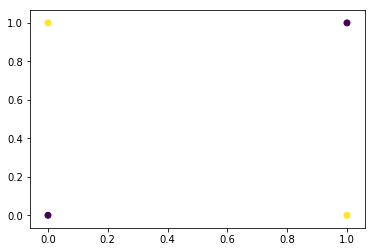

In [13]:
plt.scatter(data["x1"], data["x2"], c=data["y"])

### Define Sigmoid

0.000123394575986
0.5
0.999876605424


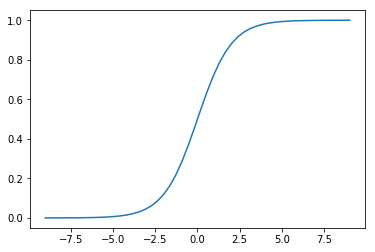

In [14]:
def sigmoid(n):
    return 1 / (1 + np.exp(-n))

xx = np.linspace(start=-9.0, stop=+9.0)
yy = sigmoid(xx)

plt.plot(xx, yy)

print(sigmoid(-9))
print(sigmoid(0))
print(sigmoid(+9))

### Multi-layer Neural Network

In [18]:
X = data[["x1", "x2"]].values
y = data["y"].values.reshape(4, 1)

w1 = np.random.uniform(low=0.0, high=1.0, size=(2, 3))
w2 = np.random.uniform(low=0.0, high=1.0, size=(3, 1))

num_epoch = 300

for epoch in range(num_epoch):
    # Forward propagation
    z1 = X.dot(w1)
    a1 = sigmoid(z1)
    z2 = a1.dot(w2)
    a2 = sigmoid(z2)
    
    predict = a2 > 0.5
    error = (predict != y).mean()
    if error == 0:
        break
    
    if epoch % 30 == 0:
        print("{0:3} error = {1:.5f}".format(epoch, error))
    
    # Backpropagation
    d2 = a2 - y
    d1 = d2.dot(w2.T) * a1 * (1 - a1)

    w2 = w2 - a1.T.dot(d2)
    w1 = w1 - X.T.dot(d1)
    
print("----" * 10)
print("{0:3} error = {1:.5f}".format(epoch, error))

  0 error = 0.50000
 30 error = 0.50000
 60 error = 0.25000
 90 error = 0.25000
----------------------------------------
 92 error = 0.00000
